In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import uproot 
import awkward as ak
from pathlib import Path

from typing import Dict, List 
import re
import pickle
from tqdm import tqdm

In [2]:
file = '/global/cfs/projectdirs/atlas/hrzhao/qgcal/BDT_EPEML/pkls_etalabel/all_JZs_format1.pkl'
all_sample = pd.read_pickle(file)

In [3]:
all_JZs_list = []
for key, value in all_sample.items():
    all_JZs_list.append(value)

all_jets = pd.concat(all_JZs_list)

In [4]:
all_jets = all_jets.drop('event', axis = 1)

## Physical weights

[]

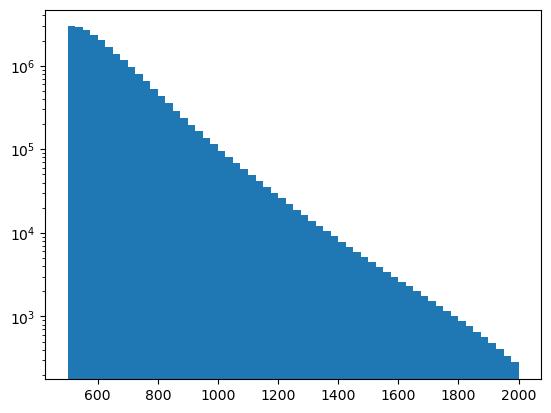

In [5]:
fig, ax = plt.subplots()
pt_edges = np.linspace(500, 2000, 61)
bin_contents, bin_edges, _ = ax.hist(all_jets['jet_pt'], bins=pt_edges, weights=all_jets['total_weight'])
ax.set_yscale('log')
plt.plot()


## Flatten Pt

### Plot

In [6]:
flat_weight_factor = 1./bin_contents
pt_binned_sample_alljets_idx = np.digitize(all_jets['jet_pt'], pt_edges)

In [7]:
all_jets['flatpt_weight'] = all_jets['total_weight']

In [8]:
for i in tqdm(range(np.max(pt_binned_sample_alljets_idx))):
    mod_idx = np.where(pt_binned_sample_alljets_idx-1 == i)[0]
    all_jets.iloc[mod_idx, all_jets.columns.get_loc('flatpt_weight')] *= flat_weight_factor[i]
    ## df.iloc[0, df.columns.get_loc('COL_NAME')] = x

100%|██████████| 60/60 [00:11<00:00,  5.27it/s]


[]

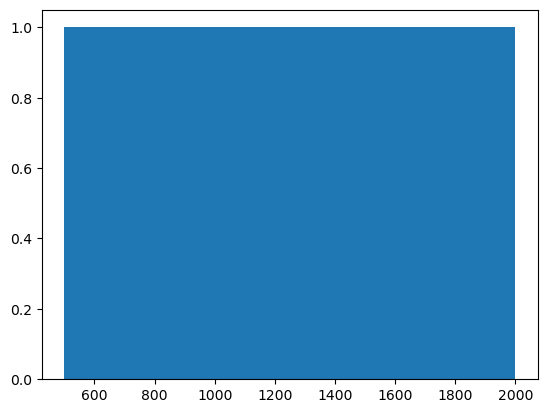

In [9]:
fig, ax = plt.subplots()
pt_edges = np.linspace(500, 2000, 61)
bin_contents, bin_edges, _ = ax.hist(all_jets['jet_pt'], bins=pt_edges, weights=all_jets['flatpt_weight'])
# ax.set_yscale('log')
plt.plot()


### Adjust the columns 

In [10]:
all_jets['equal_weight'] = np.ones(len(all_jets))

In [11]:
all_jets

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,total_weight,is_forward,target,flatpt_weight,equal_weight
0,766.747925,1.298662,2.0,0.318292,0.215923,-0.192873,21.0,17.609434,1.0,1.0,2.703190e-05,1.0
1,701.621765,-0.989431,2.0,0.269898,0.157799,-0.126821,-1.0,17.609434,0.0,0.0,1.835155e-05,1.0
0,680.507996,0.447689,24.0,0.064352,0.208339,0.066904,2.0,0.331535,0.0,0.0,2.858433e-07,1.0
1,619.839111,0.588775,34.0,0.115656,0.298206,0.232268,21.0,0.331535,1.0,1.0,1.655248e-07,1.0
2,721.692932,-0.716669,12.0,0.049718,0.220595,-0.169604,2.0,0.377624,0.0,0.0,3.935379e-07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3289,1457.898315,0.005210,34.0,0.115294,0.286379,0.114355,2.0,0.000004,0.0,0.0,6.099312e-10,1.0
3290,1995.521240,-0.060916,11.0,0.011609,0.114598,-0.515630,21.0,0.000005,0.0,1.0,1.795163e-08,1.0
3291,1609.661865,-0.132251,18.0,0.021626,0.172496,-0.195778,1.0,0.000005,1.0,0.0,1.934711e-09,1.0
3292,1849.435181,0.042168,27.0,0.038713,0.222048,0.089088,21.0,0.000004,0.0,1.0,5.221758e-09,1.0


In [12]:
all_jets.rename(columns = {'total_weight':'event_weight'}, inplace = True)
col_list = list(all_jets)
print(col_list)

['jet_pt', 'jet_eta', 'jet_nTracks', 'jet_trackWidth', 'jet_trackC1', 'jet_trackBDT', 'jet_PartonTruthLabelID', 'event_weight', 'is_forward', 'target', 'flatpt_weight', 'equal_weight']


In [13]:
insert_pos = col_list.index('event_weight')
adj_col_list = col_list[:insert_pos] + ['equal_weight'] + [col_list[insert_pos]] + [col_list[-2]] + col_list[insert_pos+2:-2]

In [14]:
adj_col_list

['jet_pt',
 'jet_eta',
 'jet_nTracks',
 'jet_trackWidth',
 'jet_trackC1',
 'jet_trackBDT',
 'jet_PartonTruthLabelID',
 'equal_weight',
 'event_weight',
 'flatpt_weight',
 'target']

In [15]:
all_jets = all_jets.reindex(columns = adj_col_list)
all_jets = all_jets[all_jets['event_weight'] != 0]

In [16]:
all_jets.head()

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,equal_weight,event_weight,flatpt_weight,target
0,766.747925,1.298662,2.0,0.318292,0.215923,-0.192873,21.0,1.0,17.609434,2.703190e-05,1.0
1,701.621765,-0.989431,2.0,0.269898,0.157799,-0.126821,-1.0,1.0,17.609434,1.835155e-05,0.0
0,680.507996,0.447689,24.0,0.064352,0.208339,0.066904,2.0,1.0,0.331535,2.858433e-07,0.0
1,619.839111,0.588775,34.0,0.115656,0.298206,0.232268,21.0,1.0,0.331535,1.655248e-07,1.0
2,721.692932,-0.716669,12.0,0.049718,0.220595,-0.169604,2.0,1.0,0.377624,3.935379e-07,0.0


In [17]:
all_jets.to_pickle("./sample_all_jets.pkl")

## Sample 1500GeV

In [18]:
sample_1500 = all_jets[(all_jets['jet_pt'] >= 1500) & (all_jets['jet_PartonTruthLabelID'] != -1)]

In [19]:
sample_1500.head()

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,equal_weight,event_weight,flatpt_weight,target
85560,1511.467407,0.247338,10.0,0.031250,0.001515,-0.395174,2.0,1.0,0.084989,0.000019,0.0
88990,1507.199219,1.093136,14.0,0.074629,0.191400,-0.149781,2.0,1.0,0.057639,0.000013,0.0
94690,1509.499756,-1.354374,6.0,0.020697,0.005082,-0.524410,2.0,1.0,0.084026,0.000019,0.0
136124,1514.553467,1.063912,16.0,0.044602,0.237015,-0.124811,21.0,1.0,0.043380,0.000010,1.0
176406,1545.118408,-0.063161,5.0,0.025243,0.074086,-0.506315,2.0,1.0,0.103662,0.000026,0.0


In [20]:
sample_1500.describe()

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,equal_weight,event_weight,flatpt_weight,target
count,5.196092e+06,5.196092e+06,5.196092e+06,5.196092e+06,5.196092e+06,5.196092e+06,5.196092e+06,5196092.0,5.196092e+06,5.196092e+06,5.196092e+06
mean,1.740521e+03,-2.090010e-03,2.393672e+01,4.297454e-02,1.846692e-01,-1.007320e-01,7.029111e+00,1.0,6.321431e-03,3.848796e-06,2.713016e-01
std,1.416712e+02,6.109243e-01,1.215201e+01,4.109854e-02,7.255678e-02,2.588316e-01,8.543710e+00,0.0,6.539153e-03,2.920732e-06,4.446314e-01
min,1.500000e+03,-1.978063e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-7.928984e-01,1.000000e+00,1.0,1.941011e-10,1.135740e-13,0.000000e+00
25%,1.614756e+03,-4.491268e-01,1.500000e+01,1.586081e-02,1.365586e-01,-2.939629e-01,2.000000e+00,1.0,1.701210e-03,1.943866e-06,0.000000e+00
50%,1.745944e+03,-6.074335e-03,2.200000e+01,2.842573e-02,1.890225e-01,-7.668706e-02,2.000000e+00,1.0,2.284849e-03,3.293183e-06,0.000000e+00
75%,1.859209e+03,4.451495e-01,3.100000e+01,5.658886e-02,2.380516e-01,9.868599e-02,2.100000e+01,1.0,1.072727e-02,4.926256e-06,1.000000e+00
max,2.000000e+03,1.983067e+00,1.170000e+02,4.174403e-01,3.783548e-01,5.308769e-01,2.100000e+01,1.0,3.327150e-01,2.640056e-04,1.000000e+00


In [21]:
all_jets.to_pickle("./sample_1500_all_jets.pkl")

In [22]:
sample_quark = sample_1500[sample_1500['target']==0]
sample_gluon = sample_1500[sample_1500['target']==1]

n_quark = len(sample_quark)
n_gluon = len(sample_gluon)

In [23]:
n_sample = np.min([n_quark, n_gluon])

In [24]:
subset_sample_quark = sample_quark.sample(n=n_sample)
subset_sample_gluon = sample_gluon.sample(n=n_sample)


In [25]:
subset_sample_1500 = pd.concat([subset_sample_quark, subset_sample_gluon])

In [26]:
len(subset_sample_1500)

2819416

In [27]:
subset_sample_1500.to_pickle("./sample_1500_2p8M_jets.pkl")